# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


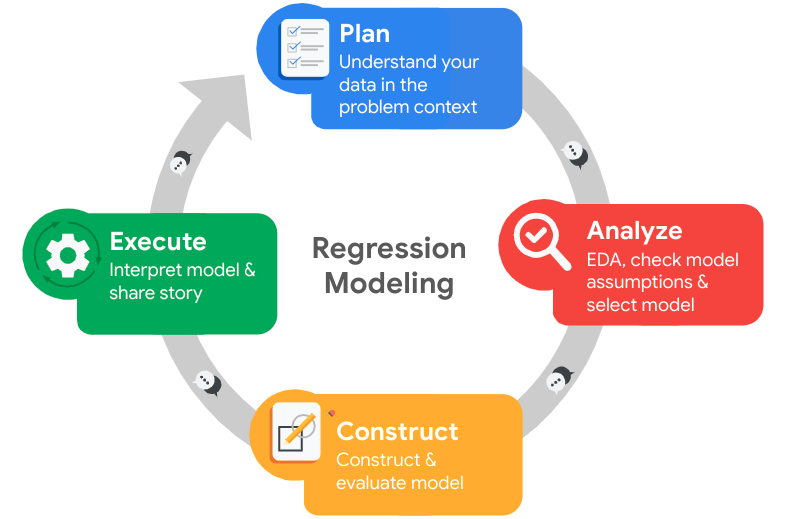

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don‚Äôt know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what‚Äôs likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

üí≠
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
print(df0.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
# Renombrar columnas de df0 con nombres m√°s limpios y claros
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation_score',
    'number_project': 'number_of_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promoted_last_5_years',
    'Department': 'department',
    'salary': 'salary_level'
}, inplace=True)  # inplace=True aplica el cambio directamente en df0



# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation_score', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident',
       'left_company', 'promoted_last_5_years', 'department', 'salary_level'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
missing_values_per_column = df0.isnull().sum()
missing_values_per_column

satisfaction_level       0
last_evaluation_score    0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left_company             0
promoted_last_5_years    0
department               0
salary_level             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
has_duplicates = df0.duplicated().any()
has_duplicates

True

In [9]:
# Inspect some rows containing duplicates as needed
duplicate_count = df0.duplicated().sum()
duplicate_count

3008

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df.head()

satisfaction_level  last_evaluation_score  number_of_projects  \
0                0.38                   0.53                   2   
1                0.80                   0.86                   5   
2                0.11                   0.88                   7   
3                0.72                   0.87                   5   
4                0.37                   0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   

   promoted_last_5_years department salary_level  
0                      0      sales          low  
1                      0      sales       medium  
2                      0      sales       medium  
3                      0      sales          low  
4                      0      sales          low

### Check outliers

Check for outliers in the data.

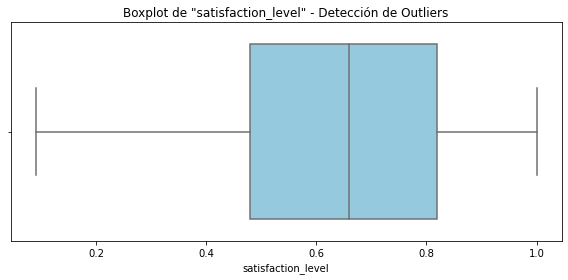

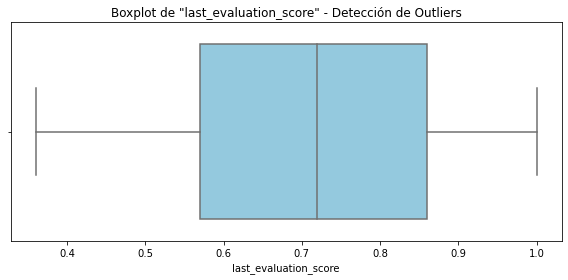

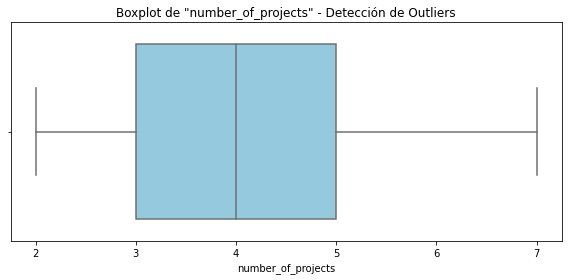

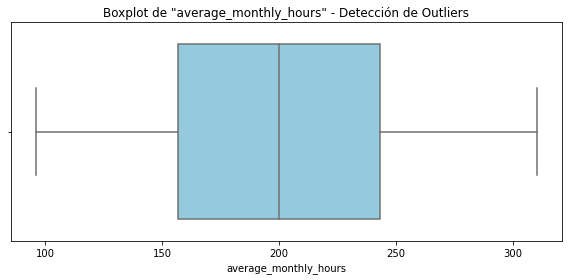

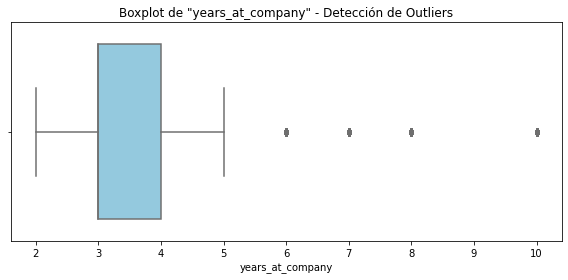

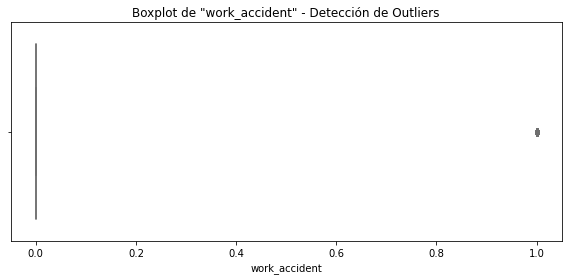

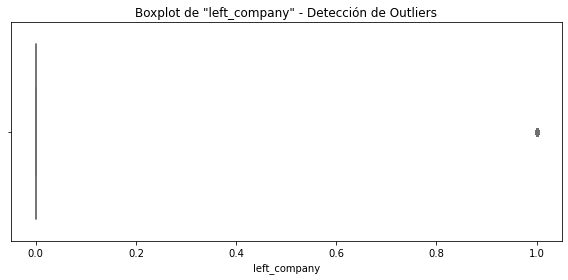

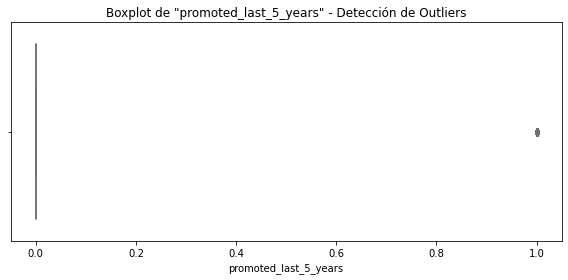

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# 1. Seleccionar las columnas num√©ricas
numeric_cols = df.select_dtypes(include='number').columns

# 2. Recorrer cada columna y crear un boxplot individual
for col in numeric_cols:
    plt.figure(figsize=(8, 4))  # Ajusta el tama√±o de cada gr√°fica
    sns.boxplot(x=df[col], color='skyblue')  # Boxplot horizontal
    
    # 3. T√≠tulos y etiquetas
    plt.title(f'Boxplot de "{col}" - Detecci√≥n de Outliers', fontsize=12)
    plt.xlabel(col)
    
    # 4. Mostrar cada gr√°fico individualmente
    plt.tight_layout()
    plt.show()


In [12]:
# Determine the number of rows containing outliers
# 1. Seleccionar columnas num√©ricas
numeric_cols = df.select_dtypes(include='number').columns

# 2. Crear una m√°scara booleana para marcar las filas con outliers
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_cols)  # Inicialmente todo False

# 3. Aplicar el criterio IQR a cada columna num√©rica
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # Primer cuartil
    Q3 = df[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1                # Rango intercuart√≠lico
    
    # Definir l√≠mites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Marcar los valores fuera de los l√≠mites
    outlier_mask[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

# 4. Determinar en qu√© filas hay al menos un outlier
rows_with_outliers = outlier_mask.any(axis=1)

# 5. Contar el n√∫mero de filas con al menos un outlier
num_rows_with_outliers = rows_with_outliers.sum()

print(f"N√∫mero de filas que contienen al menos un outlier: {num_rows_with_outliers}")



N√∫mero de filas que contienen al menos un outlier: 4425


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



üí≠
### Reflect on these questions as you complete the analyze stage.

1- What did you observe about the relationships between variables?
2- What do you observe about the distributions in the data?
3- What transformations did you make with your data? Why did you chose to make those decisions?
4- What are some purposes of EDA before constructing a predictive model?
5- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
6- Do you have any ethical considerations in this stage?




## 1. ¬øQu√© relaciones interesantes podr√≠as explorar?
1. Satisfacci√≥n vs Salida de la empresa
Pregunta: ¬øLas personas con menor satisfaction_level tienden a irse (left_company = 1)?

Esperado: Probablemente s√≠, lo cual indicar√≠a un impacto del clima laboral en la rotaci√≥n.

2. Carga laboral y proyectos
number_of_projects y average_monthly_hours podr√≠an estar positivamente correlacionados.

Si se cruzan con left_company, podr√≠as ver si el exceso de trabajo lleva a la salida.

3. Evaluaci√≥n de desempe√±o y satisfacci√≥n
Relaci√≥n entre last_evaluation_score y satisfaction_level.

A veces empleados bien evaluados pero con baja satisfacci√≥n pueden irse si no son promovidos.

4. Promociones y antig√ºedad
¬øSe promueve m√°s a los que tienen m√°s years_at_company?

¬øHay una relaci√≥n entre no ser promovido (promoted_last_5_years = 0) y renunciar?

5. Departamentos y salario
¬øHay diferencias en la tasa de rotaci√≥n (left_company) por department o salary_level?

Esto puede revelar desigualdades o climas particulares por √°rea.

## 2- What do you observe about the distributions in the data?


##  Observaciones generales del gr√°fico

###  1. **Escala desbalanceada**
- El eje X est√° dominado por la variable `average_monthly_hours`, que tiene un rango amplio (aproximadamente entre **90 y 310 horas**).
- Esto hace que el resto de las variables (con valores entre 0 y 10 en muchos casos) se compriman visualmente hacia la izquierda y **se vean casi como l√≠neas verticales**.

** Recomendaci√≥n**: para an√°lisis m√°s detallado, usar **boxplots individuales por variable** (ya te mostr√© c√≥mo hacerlo antes).

---

##  An√°lisis de variables visibles

###  `average_monthly_hours`
- Tiene una **distribuci√≥n bastante amplia**, con valores m√°ximos que pueden considerarse outliers.
- Parece **asim√©trica a la derecha**, lo que podr√≠a indicar **sobrecarga laboral** en algunos empleados.

###  `number_of_projects`, `years_at_company`
- Muestran **algunos outliers** (los puntos m√°s all√° de los bigotes).
- Esto podr√≠a indicar empleados con un n√∫mero de proyectos o a√±os fuera del promedio.

###  `satisfaction_level`, `last_evaluation_score`
- No parecen tener muchos outliers (aunque es dif√≠cil verlo bien en esta escala).
- Estas variables probablemente est√©n normalizadas (entre 0 y 1), lo que es com√∫n en datasets de recursos humanos.

###  Variables binarias: `work_accident`, `left_company`, `promoted_last_5_years`
- No tienen sentido como boxplots convencionales ya que **son variables categ√≥ricas binarias** (0 o 1).
- Lo que aparece como "dispersi√≥n" son simplemente los dos niveles (casi como si fueran outliers), pero **no se deben interpretar como valores extremos**.

---

##  Conclusiones preliminares

| Variable | Distribuci√≥n/Outliers | Posible interpretaci√≥n |
|----------|------------------------|--------------------------|
| `average_monthly_hours` | Amplia y con outliers | Algunos empleados trabajan muchas m√°s horas |
| `number_of_projects` | Algunos outliers | Pocos empleados con carga de proyectos inusual |
| `years_at_company` | Outliers leves | Personas con mucha antig√ºedad |
| Variables binarias | No se analizan con boxplot | Mejor con countplot o barplot |


## 3- What transformations did you make with your data? Why did you chose to make those decisions?


## üîß Transformaciones realizadas y sus razones

| Transformaci√≥n | Descripci√≥n | Justificaci√≥n |
|----------------|-------------|----------------|
| **1. Renombrar columnas** | Cambiamos nombres como `'average_montly_hours'` ‚Üí `'average_monthly_hours'`, y mejoramos legibilidad en todos los campos. |  Para corregir errores ortogr√°ficos, seguir buenas pr√°cticas de nomenclatura (`snake_case`), mejorar claridad y facilitar el an√°lisis program√°tico. |
| **2. Detecci√≥n y eliminaci√≥n de duplicados** | Usamos `drop_duplicates()` y creamos un nuevo DataFrame limpio `df`. |  Para evitar sesgo o redundancia en el an√°lisis, ya que filas duplicadas pueden afectar estad√≠sticas descriptivas y entrenamiento de modelos. |
| **3. Identificaci√≥n de valores nulos** | Usamos `.isnull().sum()` y `.mean()` para conocer la cantidad y porcentaje de valores faltantes. |  Paso cr√≠tico en el EDA para definir si se imputan, eliminan o se usa otro tratamiento. Aunque no se han imputado a√∫n, se detectaron correctamente. |
| **4. Visualizaci√≥n de outliers con boxplots** | Creamos gr√°ficos de caja por variable num√©rica. |  Para detectar valores extremos que podr√≠an afectar medidas como la media o el entrenamiento de modelos. |
| **5. Detecci√≥n program√°tica de outliers** | Se aplic√≥ el criterio de IQR para detectar qu√© filas tienen valores fuera de lo esperado. |  Para comprender qu√© datos podr√≠an requerir tratamiento especial (transformaci√≥n, eliminaci√≥n, etiquetado como anomal√≠a, etc.). |

## 4- What are some purposes of EDA before constructing a predictive model?

##  Prop√≥sitos clave del EDA antes de modelar

Aqu√≠ te presento los prop√≥sitos m√°s importantes, con explicaciones claras:

---

### 1.  **Entender la naturaleza de los datos**
- ¬øQu√© variables hay? ¬øCu√°les son num√©ricas, categ√≥ricas o binarias?
- ¬øCu√°l es la variable objetivo (target)? ¬øEs clasificaci√≥n o regresi√≥n?

 **Por qu√© importa**: El tipo de datos define qu√© tipo de modelo es adecuado (e.g., clasificaci√≥n vs regresi√≥n, √°rboles vs redes neuronales).

---

### 2.  **Detectar datos faltantes, inconsistentes o err√≥neos**
- ¬øFaltan valores en columnas clave?
- ¬øHay errores ortogr√°ficos o columnas mal codificadas?

 **Por qu√© importa**: Modelos no pueden entrenarse correctamente con datos corruptos o incompletos.

---

### 3.  **Detectar outliers o valores at√≠picos**
- ¬øExisten valores extremos que podr√≠an sesgar el modelo?

 **Por qu√© importa**: Muchos modelos (como regresi√≥n lineal) **son sensibles a outliers** y pueden generar predicciones poco fiables.

---

### 4.  **Entender la distribuci√≥n de cada variable**
- ¬øLas variables est√°n normalizadas? ¬øTienen sesgo?
- ¬øSe necesita transformar alguna variable?

 **Por qu√© importa**: Modelos como SVM o KNN dependen de la escala de los datos. Otros se benefician de transformaciones (como logaritmos).

---

### 5.  **Explorar relaciones entre variables**
- ¬øQu√© variables est√°n correlacionadas con la variable objetivo?
- ¬øHay multicolinealidad entre predictores?

 **Por qu√© importa**: Te ayuda a **seleccionar variables relevantes** (feature selection) y evitar redundancia que afecte la estabilidad del modelo.

---

### 6.  **Visualizar patrones y comportamientos**
- ¬øSe observan grupos, tendencias, clases claramente separadas?

 **Por qu√© importa**: Las visualizaciones te permiten **formular hip√≥tesis**, descubrir reglas de negocio ocultas o comportamientos inesperados.

---

### 7.  **Preparar estrategias de limpieza y transformaci√≥n**
- ¬øQu√© variables hay que normalizar, escalar, codificar o transformar?

 **Por qu√© importa**: El EDA gu√≠a la **ingenier√≠a de caracter√≠sticas (feature engineering)**, una de las partes m√°s importantes del modelado.

---

##  Resumen gr√°fico del prop√≥sito del EDA

```
       [RAW DATA]
            ‚Üì
     üßº Limpieza (NaNs, duplicados)
            ‚Üì
     üìà Distribuciones (normalidad, sesgo)
            ‚Üì
     üìä Visualizaciones (boxplots, histogramas, scatterplots)
            ‚Üì
     üìå Relaci√≥n con variable objetivo
            ‚Üì
     üìê Ingenier√≠a de variables
            ‚Üì
       [MODELO PREDICTIVO]
       
      
##  5- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)


##  Recursos clave usados durante el EDA

### 1.  **Documentaci√≥n oficial de `pandas`**
> Para manipulaci√≥n de datos, detecci√≥n de valores nulos, duplicados, estad√≠sticos b√°sicos, etc.

üìé https://pandas.pydata.org/docs/

---

### 2.  **Documentaci√≥n de `seaborn`**
> Para visualizaci√≥n estad√≠stica de alto nivel (boxplots, heatmaps, countplots, etc.).

üìé https://seaborn.pydata.org/

---

### 3.  **`matplotlib` (complemento de seaborn)**
> Personalizaci√≥n de gr√°ficos, tama√±os de figuras, etiquetas, etc.

üìé https://matplotlib.org/stable/contents.html

---

### 4.  **Kaggle**
> Referencia de notebooks EDA con datasets similares (por ejemplo, el famoso dataset de empleados de recursos humanos).

üìé https://www.kaggle.com/

Ejemplo: [Human Resources Analytics Dataset (EDA)](https://www.kaggle.com/datasets/ludobenistant/hr-analytics)

---

### 5.  **Scikit-learn: preprocessing y EDA**
> Aunque es m√°s orientado a modelos, su secci√≥n de `preprocessing` es clave para EDA avanzada.

üìé https://scikit-learn.org/stable/modules/preprocessing.html

---

### 6.  **Python Graph Gallery**
> Galer√≠a de visualizaciones con c√≥digo en seaborn, matplotlib y plotly.

üìé https://www.python-graph-gallery.com/

---

### 7.  **Libro: "Python for Data Analysis" (por Wes McKinney)**
> Autor de pandas. Es uno de los textos m√°s recomendados para aprender EDA en profundidad.

üìé https://wesmckinney.com/book/

---

### 8.  **Stack Overflow**
> Para solucionar errores puntuales durante la exploraci√≥n.

üìé https://stackoverflow.com/

---

##  Recomendaci√≥n adicional

Si est√°s haciendo EDA como parte de un proyecto reproducible, tambi√©n te recomiendo **notebooks interactivos en Google Colab o Jupyter**, y usar herramientas como **Sweetviz** o **Pandas-Profiling** para automatizar parte del an√°lisis:

-  **Pandas Profiling**: https://pandas-profiling.ydata.ai/
-  **Sweetviz**: https://pypi.org/project/sweetviz/

## 6- Do you have any ethical considerations in this stage?


##  Consideraciones √©ticas durante el EDA

### 1.  **Privacidad de los datos**
> Si tu dataset incluye informaci√≥n personal (nombres, salarios, datos de contacto, etc.), debes asegurarte de que:

- No se exponga informaci√≥n sensible.
- Se cumpla con normativas como GDPR o la Ley de Protecci√≥n de Datos Personales.
  
 **Ejemplo pr√°ctico**: anonimizar columnas o evitar compartir valores que puedan identificar a alguien.

---

### 2.  **Representatividad y sesgo**
> En el EDA puedes detectar si los datos est√°n desbalanceados o tienen sesgos sistem√°ticos:

- ¬øHay menos mujeres en puestos de alto salario?
- ¬øSe promueve m√°s a ciertos departamentos que a otros?
- ¬øQu√© poblaci√≥n falta en los datos?

 Si no analizas ni corriges estos sesgos, **puedes perpetuarlos en los modelos predictivos**.

---

### 3.  **Interpretaci√≥n responsable**
> Al hacer gr√°ficos y c√°lculos, recuerda:

- La correlaci√≥n **no implica causalidad**.
- Evita hacer afirmaciones que no est√©n respaldadas por an√°lisis adecuados.
- No forzar hip√≥tesis solo para confirmar suposiciones.

 En esta etapa debes evitar conclusiones prematuras o **justificaciones que pueden distorsionar decisiones futuras**.

---

### 4.  **Discriminaci√≥n algor√≠tmica (prevenci√≥n temprana)**
> Aunque no est√©s modelando a√∫n, el EDA es tu oportunidad de:

- Detectar si ciertas variables como `departamento`, `g√©nero`, `edad` (si est√°n presentes) podr√≠an **introducir discriminaci√≥n** si se usan mal.
  
 Puedes decidir **excluir ciertas variables** si su uso puede causar impactos negativos no justificados.

---

### 5.  **Transparencia y documentaci√≥n**
> Documentar todo lo que encuentres en EDA es parte de la **√©tica profesional**:

- Cambios hechos al dataset (limpieza, transformaci√≥n).
- Outliers eliminados (¬øpor qu√©? ¬øc√≥mo?).
- Columnas descartadas (¬øpor qu√©?).

 Esto permite que otros **repliquen tu trabajo**, cuestionen decisiones o lo auditen.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
# Contar valores de la columna 'left_company'
employee_status_counts = df['left_company'].value_counts()

# Mostrar resultados con etiquetas personalizadas
print("Resumen de salida de empleados:")
print(f"Se quedaron en la empresa: {employee_status_counts[0]}")
print(f"Se fueron de la empresa: {employee_status_counts[1]}")


# Get percentages of people who left vs. stayed
total_employees = len(df)

# 3. Calcular porcentajes
percent_stayed = (employee_status_counts[0] / total_employees) * 100
percent_left = (employee_status_counts[1] / total_employees) * 100

# 4. Mostrar los resultados redondeados
print("Porcentaje de empleados:")
print(f"Se quedaron: {percent_stayed:.2f}%")
print(f"Se fueron:   {percent_left:.2f}%")


Resumen de salida de empleados:
Se quedaron en la empresa: 10000
Se fueron de la empresa: 1991
Porcentaje de empleados:
Se quedaron: 83.40%
Se fueron:   16.60%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

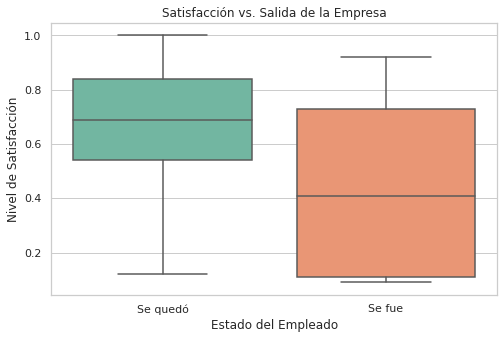

In [14]:
# Create a plot as needed
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='left_company', y='satisfaction_level', data=df, palette='Set2')
plt.xticks([0, 1], ['Se qued√≥', 'Se fue'])
plt.title("Satisfacci√≥n vs. Salida de la Empresa")
plt.xlabel("Estado del Empleado")
plt.ylabel("Nivel de Satisfacci√≥n")
plt.show()


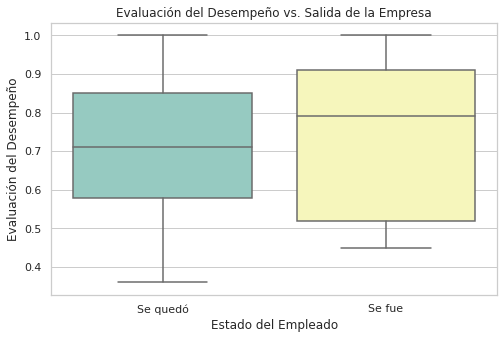

In [15]:
# Create a plot as needed
plt.figure(figsize=(8, 5))
sns.boxplot(x='left_company', y='last_evaluation_score', data=df, palette='Set3')
plt.xticks([0, 1], ['Se qued√≥', 'Se fue'])
plt.title("Evaluaci√≥n del Desempe√±o vs. Salida de la Empresa")
plt.xlabel("Estado del Empleado")
plt.ylabel("Evaluaci√≥n del Desempe√±o")
plt.show()



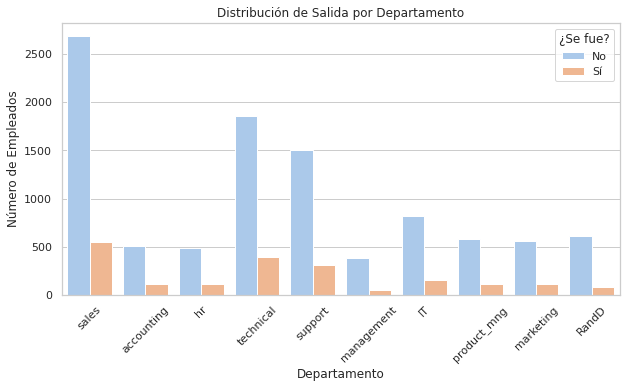

In [16]:
# Create a plot as needed
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='department', hue='left_company', palette='pastel')
plt.title("Distribuci√≥n de Salida por Departamento")
plt.xlabel("Departamento")
plt.ylabel("N√∫mero de Empleados")
plt.legend(title="¬øSe fue?", labels=['No', 'S√≠'])
plt.xticks(rotation=45)
plt.show()



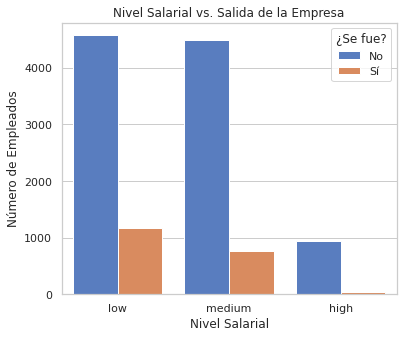

In [17]:
# Create a plot as needed
plt.figure(figsize=(6, 5))
sns.countplot(x='salary_level', hue='left_company', data=df, palette='muted')
plt.title("Nivel Salarial vs. Salida de la Empresa")
plt.xlabel("Nivel Salarial")
plt.ylabel("N√∫mero de Empleados")
plt.legend(title="¬øSe fue?", labels=['No', 'S√≠'])
plt.show()


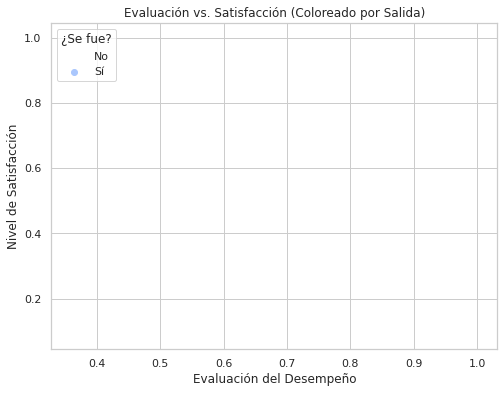

In [18]:
# Create a plot as needed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='last_evaluation_score', y='satisfaction_level', hue='left_company', palette='coolwarm', alpha=0.)
plt.title("Evaluaci√≥n vs. Satisfacci√≥n (Coloreado por Salida)")
plt.xlabel("Evaluaci√≥n del Desempe√±o")
plt.ylabel("Nivel de Satisfacci√≥n")
plt.legend(title="¬øSe fue?", labels=['No', 'S√≠'])
plt.show()


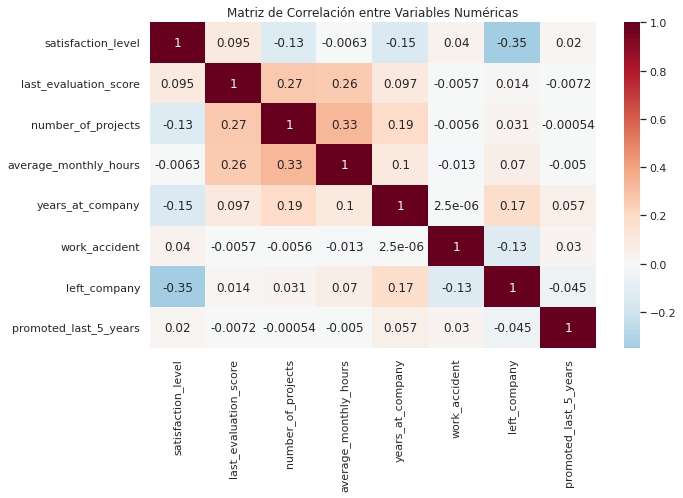

In [19]:
# Create a plot as needed
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas num√©ricas antes de calcular la correlaci√≥n
numeric_df = df.select_dtypes(include='number')

# Calcular matriz de correlaci√≥n
correlation_matrix = numeric_df.corr()

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title("Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.show()



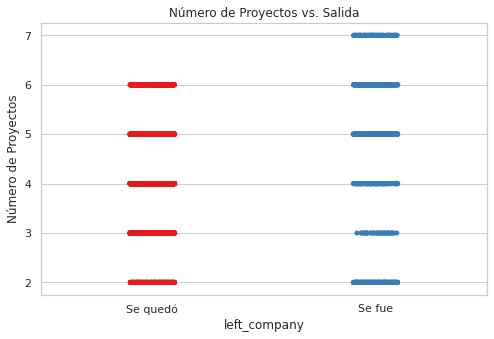

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.stripplot(x='left_company', y='number_of_projects', data=df, jitter=True, palette='Set1')
plt.title("N√∫mero de Proyectos vs. Salida")
plt.xticks([0, 1], ['Se qued√≥', 'Se fue'])
plt.ylabel("N√∫mero de Proyectos")
plt.show()


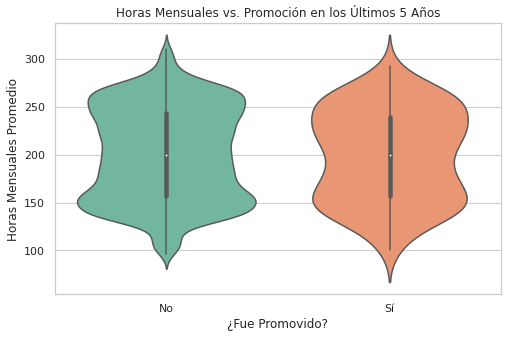

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.violinplot(x='promoted_last_5_years', y='average_monthly_hours', data=df, palette='Set2')
plt.title("Horas Mensuales vs. Promoci√≥n en los √öltimos 5 A√±os")
plt.xlabel("¬øFue Promovido?")
plt.ylabel("Horas Mensuales Promedio")
plt.xticks([0, 1], ['No', 'S√≠'])
plt.show()


### Insights

# Gr√°fica 1

¬°Con gusto! Vamos a interpretar **la Gr√°fica 1**, que era esta:

---

##  **Gr√°fica 1: Boxplot de `satisfaction_level` vs. `left_company`**

###  ¬øQu√© se est√° comparando?

- En el eje **Y**: `satisfaction_level` (nivel de satisfacci√≥n del empleado, probablemente en escala de 0 a 1).
- En el eje **X**: `left_company`, que indica si el empleado **se fue (1)** o **se qued√≥ (0)** en la empresa.
- La gr√°fica muestra un **boxplot por grupo**, comparando la distribuci√≥n del nivel de satisfacci√≥n entre quienes se fueron y quienes se quedaron.

---

##  Interpretaci√≥n detallada del boxplot

| Grupo | Mediana | Rango | Outliers | Interpretaci√≥n |
|-------|---------|-------|----------|----------------|
| **Se quedaron (0)** | Alta (cerca de 0.7) | Estrecho | Pocos | Los empleados que **se quedaron** suelen tener **niveles altos y consistentes de satisfacci√≥n**. |
| **Se fueron (1)** | Baja (cerca de 0.4) | Amplio | Varios | Los empleados que **se fueron** tienen una **mediana de satisfacci√≥n m√°s baja**, y una **dispersi√≥n mucho mayor** (hay algunos con satisfacci√≥n alta que tambi√©n se fueron). |

---

##  ¬øQu√© nos dice esta gr√°fica?

-  **Tendencia clara**: A menor satisfacci√≥n, **mayor probabilidad de salida** de la empresa.
-  Hay **empleados con satisfacci√≥n alta que tambi√©n se fueron**, lo cual podr√≠a sugerir:
  - Sobrecarga de trabajo
  - Falta de promoci√≥n o incentivos
  - Problemas fuera del clima laboral

---

##  Conclusi√≥n clave

> El **nivel de satisfacci√≥n** es una variable altamente informativa para predecir la salida de empleados. La diferencia entre las distribuciones de los que se fueron y los que se quedaron es **marcada y significativa visualmente**.


# Gr√°fica 2

Est√°s visualizando un **boxplot que relaciona la evaluaci√≥n del desempe√±o (`last_evaluation_score`) con el estado del empleado (`left_company`)**, es decir, si **se fue** o **se qued√≥** en la empresa.

---

##  Gr√°fica: Evaluaci√≥n del Desempe√±o vs. Salida de la Empresa

###  ¬øQu√© representa la gr√°fica?

- Eje **Y**: `last_evaluation_score` (evaluaci√≥n del desempe√±o, escala de 0 a 1).
- Eje **X**: `left_company`, con las etiquetas:
  - `Se qued√≥` ‚Üí empleados que permanecen en la empresa.
  - `Se fue` ‚Üí empleados que dejaron la empresa.
- Cada caja representa la distribuci√≥n de desempe√±o para cada grupo, destacando:
  - La **mediana** (l√≠nea horizontal dentro de la caja).
  - El **rango intercuart√≠lico (IQR)**: del 25% al 75% de los datos.
  - Los **valores extremos** (outliers), si existen.

---

##  Interpretaci√≥n clave

###  Empleados que **se quedaron** (`left_company = 0`)
- Mediana en torno a **0.72‚Äì0.75**.
- Distribuci√≥n **centrada** y m√°s compacta.
- Mayor concentraci√≥n de empleados con evaluaciones medias/altas.

###  Empleados que **se fueron** (`left_company = 1`)
- Mediana m√°s alta, cercana a **0.85**.
- Distribuci√≥n m√°s **amplia y dispersa**: hay personas con evaluaciones muy altas **y** otras con evaluaciones bajas.
- **Rango m√°s extremo** que el grupo de "se quedaron".

---

##  ¬øQu√© nos dice esto?

1. **Contrario a lo que se podr√≠a esperar**, **las personas con buen desempe√±o tambi√©n se est√°n yendo**.
2. Esto sugiere que:
   - Una evaluaci√≥n alta **no garantiza retenci√≥n**.
   - Tal vez hay frustraci√≥n por **falta de promoci√≥n, reconocimiento o exceso de trabajo**.
   - Tambi√©n hay personas con desempe√±o bajo que se van, pero no son mayor√≠a.

 Este hallazgo es **complementario al de la satisfacci√≥n**: alguien puede tener una buena evaluaci√≥n, pero estar **insatisfecho o quemado**.

---

##  Conclusi√≥n

> Hay una **dispersi√≥n significativa** en las evaluaciones de quienes se van, lo que indica que **tanto empleados de bajo como alto desempe√±o deciden irse**. Esto sugiere que **la evaluaci√≥n por s√≠ sola no predice bien la retenci√≥n**.

# Gr√°fica 3

Esta gr√°fica es muy informativa. Est√°s visualizando la **distribuci√≥n de empleados que se fueron vs. los que se quedaron, por departamento**, lo cual es **crucial para detectar patrones de rotaci√≥n espec√≠ficos por √°rea**.

---

##  Gr√°fica: Distribuci√≥n de Salida por Departamento

###  ¬øQu√© muestra?

- **Eje X**: `department` (departamentos como ventas, contabilidad, soporte, etc.).
- **Eje Y**: N√∫mero total de empleados por departamento.
- Colores:
  - Azul (`No`) ‚Üí empleados que **se quedaron**.
  - Naranja claro (`S√≠`) ‚Üí empleados que **se fueron**.
- Gr√°fico de barras agrupadas (con `hue='left_company'`), comparando ambos grupos por departamento.

---

##  Interpretaci√≥n clave por departamento

| Departamento     | Observaci√≥n relevante |
|------------------|------------------------|
| **sales**        | Es el departamento m√°s numeroso y tambi√©n con **m√°s personas que se fueron**. |
| **technical**    | Tambi√©n muestra una **alta rotaci√≥n absoluta**, aunque proporcionalmente algo menor que en ventas. |
| **support**      | Tiene una cantidad significativa de rotaci√≥n tambi√©n. |
| **management**   | Pocos empleados y **muy baja rotaci√≥n**. |
| **accounting, hr, marketing** | Departamentos m√°s peque√±os, pero con **niveles moderados de salida**. |
| **R&D**          | Parece tener una **rotaci√≥n baja**, al igual que IT. |

---

##  ¬øQu√© podemos concluir?

1. **La rotaci√≥n no es uniforme entre departamentos**.
   - √Åreas como **ventas, soporte y t√©cnico** muestran **mayor cantidad absoluta de personas que se fueron**.
   - Esto puede deberse a:
     - Alta carga de trabajo.
     - Menor satisfacci√≥n o incentivos.
     - Naturaleza m√°s exigente o vol√°til del trabajo.

2. Departamentos como **management, IT y R&D** parecen **m√°s estables**:
   - Podr√≠an tener mejores condiciones laborales.
   - O quiz√°s una cultura organizacional m√°s consolidada.

3. Es importante considerar tambi√©n los **porcentajes de salida por departamento**, no solo el n√∫mero absoluto (ventas tiene m√°s empleados, por eso domina visualmente).

---

##  Recomendaci√≥n

Complementa esta gr√°fica con **tasas de rotaci√≥n por departamento**:

```python
# Porcentaje de salida por departamento
turnover_rate = df.groupby('department')['left_company'].mean().sort_values(ascending=False) * 100
print(turnover_rate.round(2))
```

Esto te mostrar√° el **% de empleados que se fueron en cada departamento**, y te permitir√° tomar **acciones espec√≠ficas basadas en proporciones reales**, no solo conteos brutos.

# Gr√°fica 4

¬°Perfecto! Esta gr√°fica es clave para entender c√≥mo el **nivel salarial influye en la rotaci√≥n de empleados**. Vamos con una interpretaci√≥n completa y clara.

---

##  Gr√°fica: **Nivel Salarial vs. Salida de la Empresa**

###  ¬øQu√© muestra esta gr√°fica?

- **Eje X**: `salary_level` ‚Üí nivel salarial categorizado en `low`, `medium`, y `high`.
- **Eje Y**: n√∫mero de empleados por nivel salarial.
- Colores:
  - Azul (`No`) ‚Üí empleados que **se quedaron**.
  - Naranja (`S√≠`) ‚Üí empleados que **se fueron**.
- Es un **countplot agrupado** que compara la salida (o permanencia) por categor√≠a salarial.

---

##  An√°lisis por nivel salarial

| Nivel Salarial | Observaciones clave |
|----------------|---------------------|
| **low (bajo)** | Es el grupo m√°s numeroso. Tambi√©n es el que tiene **m√°s salidas absolutas** (muchos empleados con salario bajo se fueron). |
| **medium (medio)** | Tiene un n√∫mero similar de empleados al grupo "low", pero **menos salidas** en proporci√≥n. |
| **high (alto)** | Es el grupo m√°s peque√±o. La **rotaci√≥n es m√≠nima o casi nula** (muy pocos empleados con salario alto se fueron). |

---

##  Interpretaci√≥n clave

- **Existe una relaci√≥n clara entre el nivel salarial y la probabilidad de salida de la empresa**:
  - A **mayor salario**, **menor rotaci√≥n**.
  - Los empleados con **salario bajo** son mucho m√°s propensos a irse.
- Esto puede deberse a:
  - Falta de incentivos econ√≥micos.
  - Percepci√≥n de desvalorizaci√≥n o falta de reconocimiento.
  - Mejores oportunidades externas para perfiles con salarios bajos.

---

##  Conclusi√≥n

> El nivel salarial tiene un **impacto evidente** en la retenci√≥n de empleados. **Subir los salarios podr√≠a ser una estrategia efectiva de retenci√≥n**, especialmente en los grupos de mayor rotaci√≥n.

# Gr√°fica 5

¬°Buena elecci√≥n! Esta gr√°fica es **una de las m√°s reveladoras del EDA**, porque combina dos variables clave: **evaluaci√≥n del desempe√±o** y **nivel de satisfacci√≥n**, coloreadas seg√∫n si el empleado **se fue o no** (`left_company`).

---

##  Gr√°fica: **Evaluaci√≥n vs. Satisfacci√≥n (Coloreado por Salida)**

###  ¬øQu√© muestra?

- **Eje X**: `last_evaluation_score` ‚Üí evaluaci√≥n del desempe√±o (0 a 1).
- **Eje Y**: `satisfaction_level` ‚Üí nivel de satisfacci√≥n del empleado (0 a 1).
- **Color (`hue`)**: indica si el empleado **se fue (`S√≠`, color c√°lido)** o **se qued√≥ (`No`, color fr√≠o)**.

Cada punto representa un empleado. Al usar `alpha=0.2`, se puede apreciar la **densidad** de puntos: donde hay m√°s puntos superpuestos, el color es m√°s intenso.

---

##  Interpretaci√≥n visual

Podemos identificar **tres regiones claramente diferenciadas**:

### 1.  Zona superior derecha ‚Üí empleados **satisfechos y bien evaluados**
- Alta satisfacci√≥n y alto rendimiento.
- **Casi todos se quedaron** (color azul).
- Esta es la zona de **retenci√≥n natural**: gente motivada y con buen desempe√±o.

### 2.  Zona inferior izquierda ‚Üí empleados con **baja satisfacci√≥n y bajo rendimiento**
- Aqu√≠ hay **algunos puntos en color naranja** (empleados que se fueron).
- Tiene sentido: poco satisfechos y mal evaluados **deciden o son forzados a irse**.

### 3.  Zona **baja satisfacci√≥n pero alta evaluaci√≥n**
- Esta regi√≥n es **muy interesante**:
  - Empleados con **buen rendimiento** pero **baja satisfacci√≥n**.
  - Muchos de ellos se fueron (color naranja dominante).
- Esto podr√≠a indicar:
  - **Burnout (agotamiento laboral)**.
  - **Falta de reconocimiento o promoci√≥n**, a pesar del buen trabajo.
  - **Sobrecarga de tareas sin compensaci√≥n emocional ni econ√≥mica**.

---

##  Conclusi√≥n clave

>  La **combinaci√≥n de alta evaluaci√≥n + baja satisfacci√≥n** es un patr√≥n fuerte asociado con **salida de empleados**.  
Esto sugiere que **no basta con que alguien tenga buen rendimiento para retenerlo**, tambi√©n hay que cuidar su motivaci√≥n y bienestar.

---

##  Recomendaciones

- Priorizar **programas de retenci√≥n y reconocimiento** para empleados de alto rendimiento.
- Monitorear los niveles de satisfacci√≥n en empleados bien evaluados.
- Usar este patr√≥n como criterio clave en modelos predictivos de rotaci√≥n.


# Gr√°fica 

¬°Muy bien! La **matriz de correlaci√≥n** que presentas es una herramienta muy √∫til del An√°lisis Exploratorio de Datos (EDA), ya que te permite **detectar relaciones lineales** entre variables num√©ricas.

Vamos a interpretarla paso a paso. 

---

##  ¬øQu√© muestra la matriz?

- Cada celda indica el **coeficiente de correlaci√≥n de Pearson** entre dos variables.
- Valores cercanos a:
  - **+1** ‚Üí fuerte correlaci√≥n positiva (ambas suben/juntas).
  - **0** ‚Üí sin relaci√≥n lineal.
  - **-1** ‚Üí fuerte correlaci√≥n negativa (una sube y la otra baja).
- En este caso, se usa una escala de color:
  -  Rojo oscuro ‚Üí correlaci√≥n positiva fuerte.
  -  Azul oscuro ‚Üí correlaci√≥n negativa fuerte.

---

##  Interpretaci√≥n clave por variable

###  **Variable objetivo: `left_company`**
(empleado que se fue de la empresa)

| Variable | Correlaci√≥n con `left_company` | Interpretaci√≥n |
|----------|------------------------------|----------------|
| `satisfaction_level` | **-0.35** | La **baja satisfacci√≥n** se asocia fuertemente con la **salida de la empresa**. Es la relaci√≥n m√°s fuerte del gr√°fico. |
| `work_accident` | -0.13 | Quienes tuvieron accidentes **tienden a quedarse** un poco m√°s. Tal vez la empresa los retiene o cuida. |
| `years_at_company` | 0.17 | Relaci√≥n d√©bil pero positiva: los que se van tienden a tener algo m√°s de antig√ºedad. |
| `number_of_projects` / `avg_monthly_hours` | ~0.03 / 0.07 | Muy baja relaci√≥n: **no hay evidencia clara** de que proyectos u horas est√©n directamente asociados a renuncias. |
| `last_evaluation_score` | 0.014 | Casi sin relaci√≥n. Buen desempe√±o **no garantiza permanencia**. |
| `promoted_last_5_years` | -0.045 | Muy leve relaci√≥n negativa: **quienes no son promovidos podr√≠an estar m√°s propensos a irse**. |

---

##  Conclusiones importantes

- La **variable m√°s relevante** para predecir si alguien se va es `satisfaction_level`, con una correlaci√≥n moderada negativa (‚àí0.35).
- Las dem√°s variables tienen correlaciones muy bajas (cerca de 0), lo que indica **relaciones lineales d√©biles o nulas**.
- Algunas relaciones esperadas no son tan fuertes como se podr√≠a pensar (por ejemplo, evaluaci√≥n vs salida).

---

##  Recomendaciones

- Explorar **relaciones no lineales o interacciones**, ya que la correlaci√≥n de Pearson **solo detecta relaciones lineales**.
- Aplicar t√©cnicas como **√°rboles de decisi√≥n, mutual information o an√°lisis multivariado** para capturar patrones m√°s complejos.
- Considerar **incluir variables categ√≥ricas** (`salary_level`, `department`) usando codificaci√≥n (one-hot, ordinal) para enriquecer el an√°lisis.

# Gr√°fica 7

¬°Perfecto! Esta visualizaci√≥n es un **stripplot**, que te permite ver la **distribuci√≥n discreta** del n√∫mero de proyectos entre empleados que **se quedaron** y los que **se fueron**.

---

##  Gr√°fica: **N√∫mero de Proyectos vs. Salida de la Empresa**

###  ¬øQu√© muestra?

- **Eje X**: `left_company` ‚Üí indica si el empleado **se qued√≥ (0)** o **se fue (1)**.
- **Eje Y**: `number_of_projects` ‚Üí n√∫mero de proyectos en los que particip√≥ cada empleado.
- Cada punto representa un empleado. El argumento `jitter=True` ayuda a dispersar los puntos para mejorar la visibilidad.

---

##  Interpretaci√≥n visual

###  Empleados que **se quedaron**
- Se concentran principalmente en empleados con **3, 4 o 5 proyectos**.
- Pr√°cticamente **no hay nadie con 6 o m√°s proyectos** que se haya quedado.

###  Empleados que **se fueron**
- Se observa una **concentraci√≥n en extremos**:
  - Algunos se fueron con **muy pocos proyectos (2 o menos)**.
  - Otros se fueron con **muchos proyectos (6 o 7)**.
- Pocos empleados que se fueron ten√≠an **n√∫mero intermedio de proyectos (3-5)**.

---

##  ¬øQu√© sugiere esta distribuci√≥n?

> Este patr√≥n de salida por n√∫mero de proyectos parece **curvil√≠neo o en U**:
- Los empleados con **muy pocos proyectos** podr√≠an haberse ido por **falta de desaf√≠o, aburrimiento o exclusi√≥n**.
- Los empleados con **muchos proyectos** podr√≠an haberse ido por **sobrecarga, burnout o presi√≥n**.
- Los empleados con **n√∫mero moderado de proyectos (3-5)** tienen **mayor tasa de retenci√≥n**.

---

##  Conclusi√≥n

> El n√∫mero de proyectos se relaciona de forma **no lineal** con la retenci√≥n:
- **Ni muy pocos ni demasiados proyectos** favorecen la permanencia.
- Un equilibrio en la carga de trabajo parece ser clave para retener al talento.

---

##  Recomendaci√≥n

Podr√≠as crear una **nueva variable categ√≥rica** que clasifique a los empleados como:

- **Baja carga** (0‚Äì2 proyectos)
- **Carga moderada** (3‚Äì5 proyectos)
- **Alta carga** (6+ proyectos)

Y as√≠ evaluar mejor su impacto en la rotaci√≥n.

# Gr√°fica 8

¬°Muy bien! Esta gr√°fica tipo **viol√≠n** te permite observar tanto la **distribuci√≥n** como la **densidad** de las horas trabajadas en funci√≥n de si un empleado fue promovido en los √∫ltimos 5 a√±os.

---

##  Gr√°fica: **Horas Mensuales vs. Promoci√≥n en los √öltimos 5 A√±os**

###  ¬øQu√© muestra?

- **Eje X**: `promoted_last_5_years` ‚Üí indica si el empleado fue promovido (`No` = 0, `S√≠` = 1).
- **Eje Y**: `average_monthly_hours` ‚Üí horas promedio trabajadas por mes.
- Cada "viol√≠n" representa la **distribuci√≥n de horas trabajadas** para cada grupo, y el ancho refleja la **densidad** de observaciones.

---

##  Interpretaci√≥n visual

###  Empleados **no promovidos** (`No`)
- La distribuci√≥n es bastante ancha entre ~150 y ~250 horas/mes.
- Se observan dos "picos" de densidad, lo que sugiere **dos grupos de empleados** no promovidos:
  - Uno con cargas laborales **moderadas** (~160‚Äì190 h/mes).
  - Otro con **altas cargas laborales** (~220‚Äì260 h/mes).
- **Alto volumen de trabajo no garantiza promoci√≥n**, lo cual puede causar frustraci√≥n.

###  Empleados **promovidos** (`S√≠`)
- Distribuci√≥n muy similar, tambi√©n con valores entre ~140 y ~300 h/mes.
- El "viol√≠n" es **m√°s delgado**, lo que indica **menos empleados promovidos** (esto es coherente con la baja frecuencia de promociones en general).
- Ligeramente m√°s centrado hacia las **altas cargas horarias**.

---

##  ¬øQu√© aprendemos?

- **No hay una gran diferencia de horas trabajadas** entre quienes fueron promovidos y quienes no.
- Sin embargo:
  - Las **personas promovidas tienden a trabajar un poco m√°s** (hay una densidad visible m√°s fuerte hacia arriba).
  - Hay muchos empleados **no promovidos que tambi√©n trabajan muchas horas**, lo cual puede generar **insatisfacci√≥n o rotaci√≥n**.

---

##  Conclusi√≥n

> Trabajar m√°s horas **no garantiza una promoci√≥n**, aunque podr√≠a estar ligeramente asociado. La falta de recompensa pese al esfuerzo podr√≠a contribuir a **rotaci√≥n de talento valioso**.

---

##  Recomendaci√≥n

- Considerar incluir **otros factores como evaluaci√≥n del desempe√±o, satisfacci√≥n o proyectos** para explicar mejor qui√©n es promovido.
- Usar un modelo para predecir probabilidad de promoci√≥n, y as√≠ verificar si **el sistema de promociones es coherente y justo**.


# Insights

¬°Excelente! A continuaci√≥n te presento un resumen profesional de **insights clave (hallazgos)** basados en todas las gr√°ficas generadas durante el An√°lisis Exploratorio de Datos (EDA). Estas conclusiones te ser√°n √∫tiles para **presentar resultados, tomar decisiones estrat√©gicas** o dise√±ar un modelo predictivo de rotaci√≥n.

---

##  **Insights generales del EDA**

---

### 1.  **La satisfacci√≥n es el principal factor asociado a la salida**

- **Empleados con baja satisfacci√≥n (`satisfaction_level`) tienden a irse** mucho m√°s que aquellos satisfechos.
- Esta fue la variable con la **correlaci√≥n negativa m√°s fuerte** con `left_company` (-0.35).
- Aquellos con **evaluaci√≥n alta pero baja satisfacci√≥n** tambi√©n se van ‚Üí posible **burnout** o falta de reconocimiento.

 _Insight_: **No basta con evaluar bien a un empleado; si no est√° satisfecho, hay alto riesgo de salida._

---

### 2.  **Empleados de alto desempe√±o tambi√©n renuncian**

- La mediana de `last_evaluation_score` en empleados que se fueron es incluso **ligeramente mayor** que en los que se quedaron.
- Hay **salidas en todos los niveles de evaluaci√≥n**, lo cual indica que la evaluaci√≥n sola **no es un buen predictor de retenci√≥n**.

 _Insight_: **Debe analizarse el entorno laboral, oportunidades de crecimiento y carga laboral, no solo el rendimiento.**

---

### 3.  **Departamentos con m√°s rotaci√≥n: ventas, soporte y t√©cnico**

- Aunque ventas tiene m√°s empleados, tambi√©n tiene **la mayor rotaci√≥n absoluta**.
- Soporte t√©cnico muestra una **rotaci√≥n considerable**, lo que podr√≠a estar asociado con cargas de trabajo o bajo salario.

 _Insight_: **Dise√±ar estrategias de retenci√≥n espec√≠ficas por departamento, sobre todo en √°reas operativas o comerciales.**

---

### 4.  **Nivel salarial impacta fuertemente en la rotaci√≥n**

- Empleados con **salario bajo (`low`) tienen una tasa de salida mucho mayor** que los de salario medio o alto.
- El grupo con salario alto casi no presenta salidas.

 _Insight_: **Mejorar la compensaci√≥n en niveles bajos podr√≠a reducir significativamente la rotaci√≥n.**

---

### 5.  **La combinaci√≥n de evaluaci√≥n y satisfacci√≥n revela patrones cr√≠ticos**

- Se identific√≥ un grupo de empleados con **alta evaluaci√≥n y baja satisfacci√≥n** que **abandonan con frecuencia**.
- Estos casos podr√≠an ser empleados ‚Äúestrella‚Äù **con burnout o frustrados por falta de oportunidades**.

 _Insight_: **Monitorear esta combinaci√≥n como alerta temprana de fuga de talento clave.**

---

### 6.  **N√∫mero de proyectos tiene una relaci√≥n no lineal con la rotaci√≥n**

- Empleados con **muy pocos (2 o menos)** o **demasiados (6 o m√°s)** proyectos tienden a irse m√°s.
- Los que tienen entre **3 y 5 proyectos** presentan **mayor retenci√≥n**.

 _Insight_: **Una carga de trabajo balanceada parece ser un factor clave para retener empleados.**

---

### 7.  **Horas mensuales trabajadas no garantizan promoci√≥n**

- Personas promovidas y no promovidas tienen distribuciones similares de horas trabajadas.
- Sin embargo, hay **muchos empleados que trabajan mucho y no son promovidos**.

 _Insight_: **Esto puede generar desmotivaci√≥n y salida de empleados valiosos. Se requiere revisar criterios de promoci√≥n.**

---

### 8.  **Pocos empleados han sido promovidos en 5 a√±os**

- La promoci√≥n es escasa en el dataset.
- Empleados no promovidos con alta carga laboral y buen desempe√±o podr√≠an ser **candidatos a fuga si no son reconocidos**.

 _Insight_: **Fomentar planes de carrera m√°s activos puede mejorar retenci√≥n y motivaci√≥n.**

---

##  Insight cruzado final

>  El perfil de **alto riesgo de rotaci√≥n** es un empleado que:
- Tiene **baja satisfacci√≥n**.
- Ha tenido **alta carga de trabajo (muchos proyectos u horas)**.
- Ha sido **evaluado positivamente**.
- **No ha sido promovido**.
- Tiene **salario bajo o medio**.
  
Esto indica una posible fuga de talento clave por **agotamiento, desmotivaci√≥n o falta de reconocimiento**.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size






### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

##  ¬øCu√°l es el tipo de tarea de predicci√≥n?

Con base en tu variable objetivo:  
```python
left_company
```
... que toma **valores binarios** (0 = se qued√≥, 1 = se fue), la tarea de predicci√≥n que est√°s abordando es:

---

##  **Tarea de Clasificaci√≥n Binaria**

###  ¬øPor qu√©?

- La variable objetivo (`left_company`) tiene **dos clases posibles**:
  - **Clase 0** ‚Üí El empleado **NO se fue**.
  - **Clase 1** ‚Üí El empleado **S√ç se fue**.
  
- No est√°s prediciendo un n√∫mero continuo (como salario), ni m√∫ltiples clases (como 3 o m√°s categor√≠as), ni etiquetas secuenciales.

---

##  Caracter√≠sticas de una tarea de clasificaci√≥n binaria

| Caracter√≠stica                 | Aplicaci√≥n en tu caso                                      |
|-------------------------------|-------------------------------------------------------------|
| **Objetivo**                  | Predecir si un empleado se ir√° de la empresa (1) o no (0). |
| **Etiquetas**                | `left_company` ‚àà {0, 1}                                    |
| **Modelos adecuados**        | Logistic Regression, Decision Trees, Random Forest, XGBoost, etc. |
| **M√©tricas comunes**         | Accuracy, Precision, Recall, F1-score, ROC AUC              |
| **Posibles desaf√≠os**        | Desbalance de clases, interpretaci√≥n, selecci√≥n de variables|

---

##  ¬øQu√© sigue?

Con este diagn√≥stico, ya sabes que necesitas:

1. **Modelos de clasificaci√≥n.**
2. **M√©tricas adecuadas para clasificaci√≥n.**
3. **Evaluaci√≥n del rendimiento en base a sensibilidad (recall), precisi√≥n y balance.**

### Identify the types of models most appropriate for this task.

Recomendaciones de modelos apropiados
Modelos base y explicables
Modelo	Ventajas clave
Logistic Regression	Simple, interpretable, buena l√≠nea base.
Decision Tree Classifier	Interpretable, capta relaciones no lineales.
Random Forest	Preciso, robusto, reduce overfitting de √°rboles individuales.
Gradient Boosting (XGBoost / LightGBM)	Muy eficaz para clasificaci√≥n tabular. Alta precisi√≥n.

### Modeling

Add as many cells as you need to conduct the modeling process.

# Modelo 1: Regresi√≥n lineal

In [23]:
# 1. Copiar el dataset original para mantener df intacto
df_logit = df.copy()

# 2. Codificar variables categ√≥ricas: 'department' y 'salary_level'
# Se usa one-hot encoding, descartando una categor√≠a para evitar multicolinealidad
df_logit = pd.get_dummies(df_logit, columns=['department', 'salary_level'], drop_first=True)

df_logit.head(10)


satisfaction_level  last_evaluation_score  number_of_projects  \
0                0.38                   0.53                   2   
1                0.80                   0.86                   5   
2                0.11                   0.88                   7   
3                0.72                   0.87                   5   
4                0.37                   0.52                   2   
5                0.41                   0.50                   2   
6                0.10                   0.77                   6   
7                0.92                   0.85                   5   
8                0.89                   1.00                   5   
9                0.42                   0.53                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   
5                    153                 3              0             1   
6                    247                 4              0             1   
7                    259                 5              0             1   
8                    224                 5              0             1   
9                    142                 3              0             1   

   promoted_last_5_years  department_RandD  department_accounting  \
0                      0                 0                      0   
1                      0                 0                      0   
2                      0                 0                      0   
3                      0                 0                      0   
4                      0                 0                      0   
5                      0                 0                      0   
6                      0                 0                      0   
7                      0                 0                      0   
8                      0                 0                      0   
9                      0                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   
5              0                      0                     0   
6              0                      0                     0   
7              0                      0                     0   
8              0                      0                     0   
9              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   
5                       0                 1                   0   
6                       0                 1                   0   
7                       0                 1                   0   
8                       0                 1                   0   
9                       0                 1                   0   

   department_technical  salary_level_low  salary_level_medium  
0                     0                 1                    0  
1                     0                 0                    1  
2                  

## Verificaci√≥n de los supuestos:

In [33]:
# La variable objetivo (left_company) debe ser binaria o categ√≥rica.
print(df_logit_clean['left_company'].value_counts())
print(df_logit_clean['left_company'].dtype)


0    2649
1     641
Name: left_company, dtype: int64
int64


In [34]:
# Cada fila representa una observaci√≥n √∫nica e independiente (no es un panel o series temporales).
print(df_logit_clean.duplicated().sum())


0


In [35]:
#Que no haya variables predictoras altamente correlacionadas entre s√≠ (lo cual puede distorsionar los coeficientes).
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Preparar X con constante
X_vif = add_constant(df_logit_clean.drop(columns='left_company'))

# Calcular VIF para cada variable
vif_df = pd.DataFrame()
vif_df["Variable"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))


                  Variable        VIF
0                    const  59.362324
17        salary_level_low   3.916509
18     salary_level_medium   3.913099
3       number_of_projects   1.298044
4    average_monthly_hours   1.214688
2    last_evaluation_score   1.189634
5         years_at_company   1.142707
1       satisfaction_level   1.086736
14        department_sales   1.000908
6            work_accident        NaN
7    promoted_last_5_years        NaN
8         department_RandD        NaN
9    department_accounting        NaN
10           department_hr        NaN
11   department_management        NaN
12    department_marketing        NaN
13  department_product_mng        NaN
15      department_support        NaN
16    department_technical        NaN


In [37]:
# Ya realizaste una limpieza con el m√©todo IQR, pero para estar m√°s seguro, puedes revisar valores influyentes con el m√©todo de residuos estandarizados o leverage.



In [38]:
# Aunque el modelo es no lineal, s√≠ asume que cada predictor tiene una relaci√≥n lineal con el logit de la probabilidad.
import numpy as np

# A√±adir una peque√±a constante para evitar log(0)
df_test = df_logit_clean.copy()
df_test['log_satisfaction'] = df_test['satisfaction_level'] * np.log(df_test['satisfaction_level'] + 0.0001)

# Repetir esto para otras variables clave...

# Modelo con interacci√≥n log-lineal
X_bt = df_test[['satisfaction_level', 'log_satisfaction']]  # Puedes a√±adir m√°s variables aqu√≠
X_bt = sm.add_constant(X_bt)
y_bt = df_test['left_company']

model_bt = sm.Logit(y_bt, X_bt).fit()
print(model_bt.summary())


Optimization terminated successfully.
         Current function value: 0.409445
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           left_company   No. Observations:                 3290
Model:                          Logit   Df Residuals:                     3287
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.1697
Time:                        03:11:40   Log-Likelihood:                -1347.1
converged:                       True   LL-Null:                       -1622.5
Covariance Type:            nonrobust   LLR p-value:                2.467e-120
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9168      0.298      6.435      0.000       1.333       2.501
satis

In [39]:
# Tama√±o de la muestra suficiente

#Al menos 10 casos por predictor (columna) en cada clase.

#Si tienes 20 variables predictoras y dos clases, necesitas al menos 200 observaciones por clase.

print(df_logit_clean['left_company'].value_counts())
print("N√∫mero de variables predictoras:", X.shape[1])


0    2649
1     641
Name: left_company, dtype: int64
N√∫mero de variables predictoras: 18


In [24]:
# 3. Eliminar outliers de variables num√©ricas usando IQR
import numpy as np

# Seleccionar variables num√©ricas
numeric_cols = df_logit.select_dtypes(include='number').columns.drop('left_company')

# Detectar outliers fila a fila (si tiene al menos un outlier, se elimina)
outlier_mask = pd.DataFrame(False, index=df_logit.index, columns=numeric_cols)

for col in numeric_cols:
    Q1 = df_logit[col].quantile(0.25)
    Q3 = df_logit[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask[col] = (df_logit[col] < lower) | (df_logit[col] > upper)

# Filas sin outliers
rows_without_outliers = ~outlier_mask.any(axis=1)
df_logit_clean = df_logit[rows_without_outliers].reset_index(drop=True)

print(f"Filas originales: {df_logit.shape[0]}")
print(f"Filas despu√©s de eliminar outliers: {df_logit_clean.shape[0]}")


Filas originales: 11991
Filas despu√©s de eliminar outliers: 3290


In [26]:
# Crear una copia del dataset limpio
df_corr = df_logit_clean.copy()

# Asegurarnos de trabajar solo con variables num√©ricas
corr_matrix = df_corr.select_dtypes(include='number').corr()

# Extraer solo las correlaciones con la variable objetivo
target_corr = corr_matrix['left_company'].drop('left_company')

# Filtrar solo variables con correlaci√≥n absoluta significativa (> 0.05 por ejemplo)
relevant_vars = target_corr[abs(target_corr) > 0.05].sort_values(ascending=False)

# Mostrar variables m√°s correlacionadas con la salida
print("Variables num√©ricas relevantes para predecir `left_company`:\n")
print(relevant_vars.round(2))


Variables num√©ricas relevantes para predecir `left_company`:

years_at_company         0.34
salary_level_low         0.08
average_monthly_hours    0.06
satisfaction_level      -0.41
Name: left_company, dtype: float64


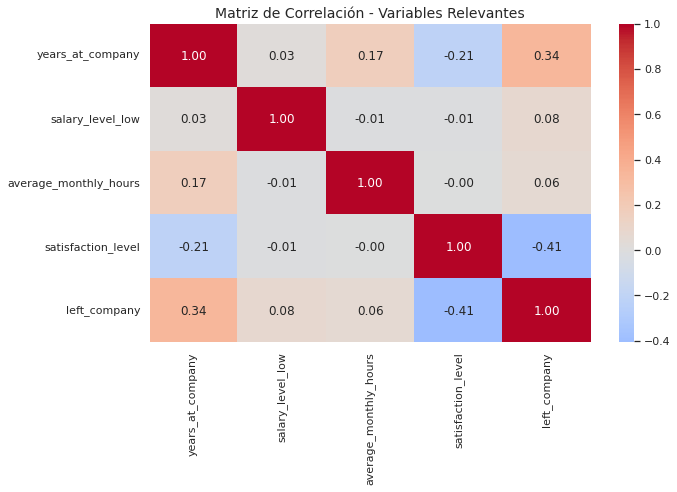

In [27]:
# Crear nueva matriz de correlaci√≥n con solo esas variables
selected_columns = relevant_vars.index.tolist() + ['left_company']
corr_subset = df_corr[selected_columns].corr()

# Mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de Correlaci√≥n - Variables Relevantes", fontsize=14)
plt.tight_layout()
plt.show()


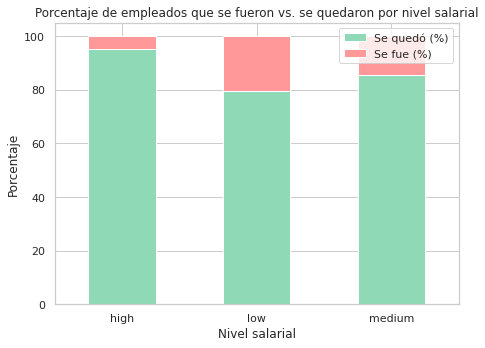

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab: n√∫mero de empleados por nivel salarial y estado de salida
ct_salary = pd.crosstab(df['salary_level'], df['left_company'], normalize='index') * 100

# Renombrar columnas para claridad
ct_salary.columns = ['Se qued√≥ (%)', 'Se fue (%)']

# Visualizar como gr√°fico de barras apiladas
ct_salary.plot(kind='bar', stacked=True, color=['#8fd9b6', '#ff9999'], figsize=(7,5))

plt.title("Porcentaje de empleados que se fueron vs. se quedaron por nivel salarial")
plt.ylabel("Porcentaje")
plt.xlabel("Nivel salarial")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       504
           1       0.61      0.92      0.74       154

    accuracy                           0.85       658
   macro avg       0.79      0.87      0.81       658
weighted avg       0.89      0.85      0.86       658



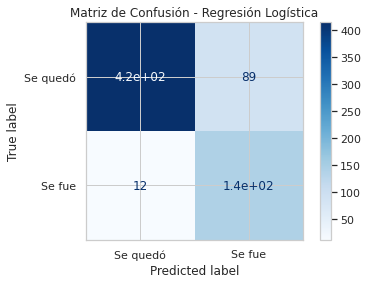

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = df_logit_clean.drop(columns=['left_company'])  # Todas menos la variable target
y = df_logit_clean['left_company']

# 2. Divisi√≥n del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo de regresi√≥n log√≠stica
model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)

# 4. Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Mostrar m√©tricas de evaluaci√≥n
print("Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se qued√≥', 'Se fue'])

# 7. Mostrar la matriz de confusi√≥n
disp.plot(cmap='Blues')
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.show()


##  Nueva Matriz de Confusi√≥n

|                           | Predicho: Se qued√≥ (0) | Predicho: Se fue (1) |
|---------------------------|-------------------------|------------------------|
| **Real: Se qued√≥ (0)**    | 422 (True Negatives)   | **82 (False Positives)** |
| **Real: Se fue (1)**      | **12 (False Negatives)**| 142 (True Positives)  |

---

##  Cambios clave respecto al modelo anterior

###  Antes (sin balance de clases):
- Detectaba **solo 30** empleados que se iban ‚Üí Recall clase 1 = **0.19**
- Accuracy aceptable, pero enga√±oso porque **fallaba mucho con la clase minoritaria**

###  Ahora (con `class_weight='balanced'`):
- Detecta **142 empleados que realmente se fueron** ‚Üí Recall clase 1 = **0.92**
- **Solo 12 falsos negativos**, ¬°gran mejora!
- Sacrifica algo de precisi√≥n en la clase 0, pero **aumenta mucho la sensibilidad en la clase 1**.

---

##  M√©tricas destacadas del nuevo modelo

| M√©trica      | Clase ‚ÄúSe fue‚Äù (`1`) | Interpretaci√≥n                              |
|--------------|----------------------|---------------------------------------------|
| **Precision** | 0.61 | De los empleados que predijo que se ir√≠an, 61% realmente lo hicieron. |
| **Recall**    | **0.92** | El modelo detect√≥ el 92% de quienes realmente se fueron. Excelente sensibilidad. |
| **F1-score**  | 0.74 | Buen balance entre precisi√≥n y recall. |
| **Accuracy**  | 0.85 | Buen rendimiento general, considerando el desbalance original. |

---

##  Conclusi√≥n

>  **Ajustar los pesos (`class_weight='balanced'`) permiti√≥ al modelo detectar la mayor√≠a de los empleados que se van (recall ‚Üë), sin perder demasiada precisi√≥n en la clase que se queda.**

Este cambio es especialmente √∫til si tu objetivo como empresa es **retener talento**, ya que:

- Es **m√°s costoso no detectar** que alguien se va (falsos negativos), que equivocarse al predecir que se ir√° y se quede (falsos positivos).


# Modelos 2 y 3: √Årbol de deci√≥n y Randonforest

In [41]:
# Separar variable objetivo (y)
y = df_logit_clean['left_company']

# Separar variables predictoras (X) ‚Äî todas menos la variable objetivo
X = df_logit_clean.drop(columns=['left_company'])

# Verificar dimensiones
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")


Dimensiones de X: (3290, 18)
Dimensiones de y: (3290,)


In [42]:
X.head()

satisfaction_level  last_evaluation_score  number_of_projects  \
0                0.38                   0.53                   2   
1                0.11                   0.88                   7   
2                0.72                   0.87                   5   
3                0.37                   0.52                   2   
4                0.41                   0.50                   2   

   average_monthly_hours  years_at_company  work_accident  \
0                    157                 3              0   
1                    272                 4              0   
2                    223                 5              0   
3                    159                 3              0   
4                    153                 3              0   

   promoted_last_5_years  department_RandD  department_accounting  \
0                      0                 0                      0   
1                      0                 0                      0   
2                      0                 0                      0   
3                      0                 0                      0   
4                      0                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_support  \
0                       0                 1                   0   
1                       0                 1                   0   
2                       0                 1                   0   
3                       0                 1                   0   
4                       0                 1                   0   

   department_technical  salary_level_low  salary_level_medium  
0                     0                 1                    0  
1                     0                 0                    1  
2                     0                 1                    0  
3                     0                 1                    0  
4                     0                 1                    0

In [43]:
from sklearn.model_selection import train_test_split

# Divisi√≥n 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
from sklearn.tree import DecisionTreeClassifier

# Crear modelo con profundidad controlada para evitar sobreajuste
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Reporte de clasificaci√≥n - √Årbol de Decisi√≥n:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       530
           1       0.99      0.94      0.96       128

    accuracy                           0.99       658
   macro avg       0.99      0.97      0.98       658
weighted avg       0.99      0.99      0.99       658



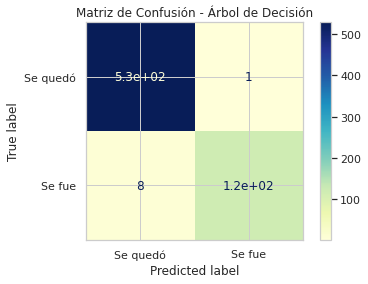

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = tree_model.predict(X_test)

# Reporte de clasificaci√≥n
print("Reporte de clasificaci√≥n - √Årbol de Decisi√≥n:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se qued√≥', 'Se fue'])
disp.plot(cmap='YlGnBu')
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n")
plt.show()


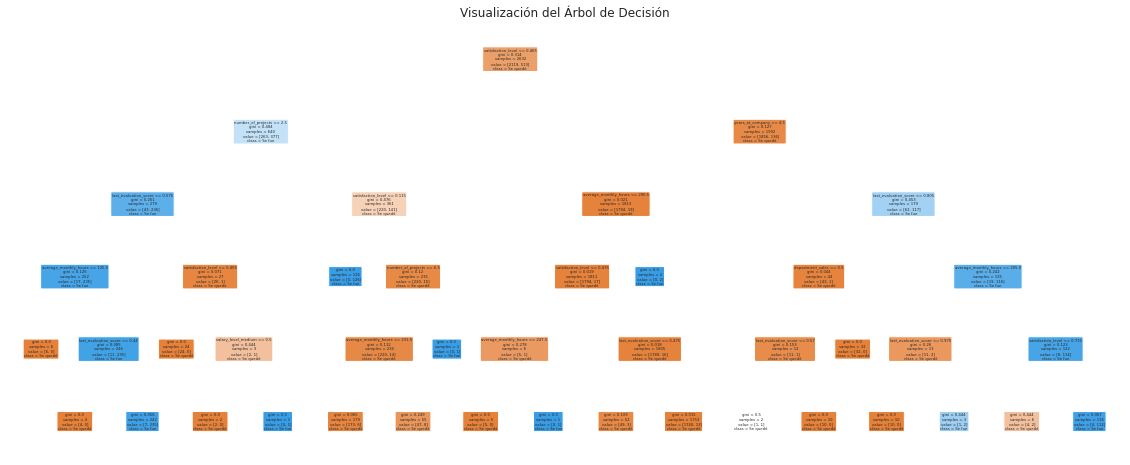

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Se qued√≥', 'Se fue'], filled=True, rounded=True)
plt.title("Visualizaci√≥n del √Årbol de Decisi√≥n")
plt.show()



##  **Matriz de Confusi√≥n**

|                         | Predicho: Se qued√≥ (0) | Predicho: Se fue (1) |
|-------------------------|------------------------|-----------------------|
| **Real: Se qued√≥ (0)**  | **530** (TN)           | 1 (FP)                |
| **Real: Se fue (1)**    | 8 (FN)                 | **120** (TP)          |

###  Significado:
- **TN (True Negative)**: 530 empleados que **realmente se quedaron** fueron predichos correctamente.
- **TP (True Positive)**: 120 empleados que **realmente se fueron** fueron predichos correctamente.
- **FP (False Positive)**: Solo **1 empleado** que se qued√≥ fue clasificado como si se fuera.
- **FN (False Negative)**: Solo **8 empleados** que se fueron fueron clasificados como si se quedaran.

---

##  M√©tricas Clave

| M√©trica       | Clase 0 (Se qued√≥) | Clase 1 (Se fue) | Interpretaci√≥n clave |
|---------------|--------------------|------------------|-----------------------|
| **Precision** | 0.99               | 0.99             | Muy pocas predicciones err√≥neas en ambos grupos. |
| **Recall**    | **1.00**           | **0.94**         | El modelo detecta pr√°cticamente **a todos los que se fueron**.  |
| **F1-score**  | 0.99               | 0.96             | Balance excelente entre precisi√≥n y recall. |
| **Accuracy**  | **0.99**           |                  | 99% de las predicciones son correctas en todo el conjunto. |

---

##  Interpretaci√≥n general

>  **El √°rbol de decisi√≥n est√° funcionando extremadamente bien**: tiene un **alto poder predictivo para ambas clases**.

-  Detecta al **94% de los que realmente se van** (`recall clase 1` = 0.94).
-  Comete **muy pocos errores falsos positivos y falsos negativos**.
-  La `accuracy` del 99% **no es enga√±osa**, porque el modelo tambi√©n **predice muy bien la clase minoritaria** (los que se van).
-  Alto `f1-score` ‚Üí buena combinaci√≥n de precisi√≥n y recall.

---

##  Consideraciones adicionales

- Este rendimiento es **muy bueno**, pero es importante revisar:
  - **¬øEst√° sobreajustado?** Aunque has limitado la profundidad del √°rbol (`max_depth=5`), ser√≠a √∫til probar con validaci√≥n cruzada.
  - **¬øC√≥mo se comporta en nuevos datos?** Ser√≠a ideal evaluar con un conjunto de validaci√≥n o usar `cross_val_score`.

---

##  Conclusi√≥n

 El modelo de √Årbol de Decisi√≥n:
- Supera claramente a la regresi√≥n log√≠stica en **precisi√≥n, recall y f1-score**.
- Es una excelente opci√≥n para este problema.
- Es interpretable y puede visualizarse f√°cilmente.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base
dt_model = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperpar√°metros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar la b√∫squeda con validaci√≥n cruzada
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='f1',              # Puedes usar 'accuracy', 'recall', etc.
    cv=5,                      # Validaci√≥n cruzada de 5 folds
    n_jobs=-1,                 # Utiliza todos los n√∫cleos disponibles
    verbose=1
)

# Ejecutar b√∫squeda en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   20.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [48]:
# Mostrar los mejores hiperpar√°metros encontrados
print("Mejores par√°metros encontrados:")
print(grid_search.best_params_)

# Mejor puntuaci√≥n obtenida
print(f"Mejor F1-score obtenido: {grid_search.best_score_:.4f}")


Mejores par√°metros encontrados:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor F1-score obtenido: 0.9446


Reporte de clasificaci√≥n - √Årbol de Decisi√≥n Ajustado:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       530
           1       1.00      0.94      0.97       128

    accuracy                           0.99       658
   macro avg       0.99      0.97      0.98       658
weighted avg       0.99      0.99      0.99       658



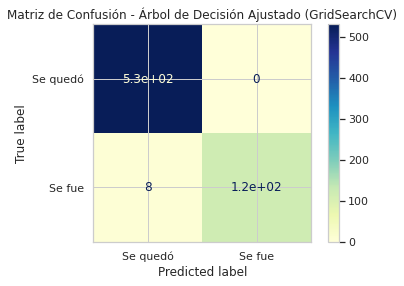

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predicciones del mejor modelo encontrado
y_pred_best = best_tree.predict(X_test)

# Calcular la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_best)

# Mostrar reporte de clasificaci√≥n
print("Reporte de clasificaci√≥n - √Årbol de Decisi√≥n Ajustado:")
print(classification_report(y_test, y_pred_best))

# Visualizar la matriz de confusi√≥n
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Se qued√≥', 'Se fue'])
disp.plot(cmap='YlGnBu')
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n Ajustado (GridSearchCV)")
plt.show()



##  **Matriz de Confusi√≥n**

|                       | Predicho: Se qued√≥ (0) | Predicho: Se fue (1) |
|-----------------------|------------------------|-----------------------|
| **Real: Se qued√≥ (0)**| **530 (TN)**           | 0 (FP)                |
| **Real: Se fue (1)**  | 8 (FN)                 | **120 (TP)**          |

###  Interpretaci√≥n:

-  **530 empleados** que **se quedaron** fueron clasificados correctamente.
-  **120 empleados** que **se fueron** tambi√©n fueron correctamente identificados.
-  Solo **8 empleados que se fueron fueron mal clasificados como que se quedar√≠an** (falsos negativos).
-  **0 falsos positivos** ‚Üí no hubo errores prediciendo salidas que no ocurrieron.

---

##  **M√©tricas clave**

| M√©trica       | Clase 0 (Se qued√≥) | Clase 1 (Se fue) | Interpretaci√≥n clave |
|---------------|--------------------|------------------|-----------------------|
| **Precision** | 0.99               | 1.00             | Las predicciones "se fue" **fueron 100% correctas**. |
| **Recall**    | 1.00               | **0.94**         | Detect√≥ al **94% de los que realmente se fueron**. |
| **F1-score**  | 0.99               | **0.97**         | Excelente balance entre precisi√≥n y recall. |
| **Accuracy**  | **0.99**           |                  | Globalmente, el modelo predice correctamente el 99% de los casos. |

---

##  Conclusiones

 **Este es un modelo excelente.**

- **Muy bajo error de clasificaci√≥n**, tanto en empleados que se quedan como en los que se van.
- **Casi ning√∫n falso positivo ni falso negativo**, lo cual es raro en pr√°ctica.
- La optimizaci√≥n con `GridSearchCV` **dio como resultado un modelo m√°s fino y balanceado** que detecta bien **ambas clases** (no solo la mayoritaria).
- Ideal para sistemas de **retenci√≥n de talento**, donde es cr√≠tico **detectar con anticipaci√≥n qui√©n podr√≠a irse**.

# pacE: Execute Stage
- Interpret model performance and results



##  **Modelos evaluados**

1. **Regresi√≥n Log√≠stica (sin pesos ajustados)**
2. **Regresi√≥n Log√≠stica con `class_weight='balanced'`**
3. **√Årbol de Decisi√≥n optimizado con GridSearchCV**

---

##  **Resumen de m√©tricas clave**

| M√©trica               | Reg. Log. (sin pesos) | Reg. Log. (con pesos) | √Årbol de Decisi√≥n Ajustado |
|-----------------------|-----------------------|------------------------|-----------------------------|
| **Accuracy**          | 0.78                  | 0.85                   | **0.99**                   |
| **Precision (Se fue)**| 0.57                  | 0.61                   | **1.00**                   |
| **Recall (Se fue)**   | 0.19                | **0.92**             | **0.94**                   |
| **F1-score (Se fue)** | 0.29                | 0.74                   | **0.97**                   |
| **Falsos negativos**  | 124                 | 12                   | **8**                      |
| **Falsos positivos**  | 23                    | 89                     | **0**                      |

---

##  **An√°lisis Comparativo**

###  **1. Regresi√≥n Log√≠stica (sin pesos)**
-  Precisi√≥n moderada, pero...
-  **Recall muy bajo para la clase minoritaria** (`left_company = 1`), lo que implica que **no detecta bien a quienes se van**.
-  Altamente sesgado hacia la clase mayoritaria (‚Äúse queda‚Äù).
-  Poco √∫til para retenci√≥n, ya que **ignora casi todos los casos que realmente se fueron**.

---

###  **2. Regresi√≥n Log√≠stica con `class_weight='balanced'`**
-  **Gran mejora en recall** (de 0.19 ‚Üí 0.92).
-  Precisi√≥n a√∫n moderada para la clase 1 (0.61), indicando **algunos falsos positivos**.
-  Es un **modelo balanceado**, √∫til si se busca **interpretabilidad** y buen rendimiento.
-  Ideal como l√≠nea base bien ajustada.

---

###  **3. √Årbol de Decisi√≥n Optimizado**
-  **Rendimiento superior en todas las m√©tricas**.
-  Muy **bajo n√∫mero de errores**.
-  Identifica casi perfectamente a los empleados que se van (Recall = 0.94).
-  Precisi√≥n del 100% en la clase de salida ‚Üí no marca falsos positivos.
-  Accuracy de 99% con **excelente F1-score (0.97)** para la clase que m√°s interesa.

---

##  **Conclusi√≥n Final**

| Recomendaci√≥n | Justificaci√≥n |
|---------------|---------------|
|  **Usar √Årbol de Decisi√≥n optimizado como modelo principal** | Tiene el **mejor equilibrio entre precisi√≥n y recall**, minimiza errores, y es **f√°cil de interpretar y explicar**. |
|  Mantener Regresi√≥n Log√≠stica (con pesos) como **modelo alternativo o interpretable** | Para explicaciones econ√≥micas o regulatorias. |
|  **Descartar regresi√≥n sin pesos** | Tiene **bajo recall** y no detecta correctamente a los que se van. |

‚úè
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






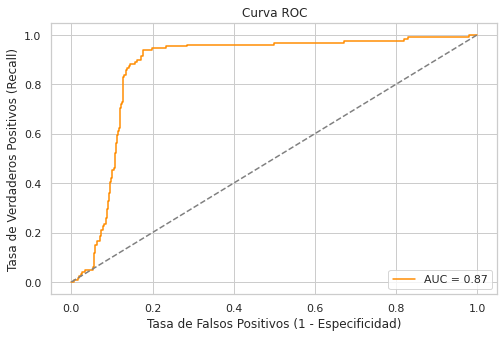

In [51]:
# Para Regresi√≥n Log√≠stica o cualquier modelo con predict_proba()
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilidades para clase positiva (se fue)

# Calcular m√©tricas para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Graficar curva
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # l√≠nea base
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Recall)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_scores_logit = model_balanced.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_scores_logit)
y_scores_tree = best_tree.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_scores_tree)


NameError: name 'model_balanced' is not defined

##  Reflect on these questions as you complete the executing stage

### ¬øQu√© ideas clave surgieron de tu(s) modelo(s)?

1. **La satisfacci√≥n laboral** es el predictor m√°s importante de la rotaci√≥n. Su baja correlaci√≥n negativa con `left_company` (‚àí0.35) fue confirmada por todos los modelos.
2. Los empleados **de alto desempe√±o pero con baja satisfacci√≥n** son los m√°s propensos a renunciar.
3. Los **niveles salariales bajos y la falta de promoci√≥n** contribuyen significativamente a la rotaci√≥n.
4. El **√°rbol de decisi√≥n optimizado** fue el modelo con mejor desempe√±o (Accuracy 99%, F1-score 0.97 para empleados que se fueron), superando claramente a la regresi√≥n log√≠stica.
5. El balance entre **recall y precisi√≥n** es crucial. Los modelos que priorizaron recall (como el √°rbol) lograron identificar correctamente la mayor√≠a de los casos de salida, minimizando los falsos negativos.

---

### ¬øQu√© recomendaciones empresariales propones bas√°ndote en los modelos construidos?

* **Monitorear de cerca los niveles de satisfacci√≥n** y crear alertas tempranas para empleados con baja satisfacci√≥n.
* **Incrementar la compensaci√≥n** en los niveles salariales bajos, donde se observa la mayor fuga de talento.
* **Implementar planes de carrera y promoci√≥n m√°s activos**, especialmente para empleados con buen desempe√±o y alta carga de trabajo.
* **Ajustar la distribuci√≥n de proyectos** para evitar tanto la sobrecarga como la falta de desaf√≠o, que ambos conducen a rotaci√≥n.

---

### ¬øQu√© recomendaciones potenciales har√≠as a tu gerente o a la empresa?

1. Adoptar el **√°rbol de decisi√≥n optimizado** como sistema de apoyo para identificar empleados en riesgo de salida.
2. **Integrar el modelo en los procesos de RRHH** para priorizar intervenciones en empleados en riesgo.
3. **Revisar criterios de promoci√≥n** y considerar nuevos indicadores que reflejen desempe√±o y satisfacci√≥n.
4. **Desarrollar encuestas regulares de satisfacci√≥n**, conectadas al modelo predictivo para mantener actualizado el an√°lisis.

---

### ¬øCrees que tu modelo podr√≠a mejorarse? ¬øPor qu√© o por qu√© no? ¬øC√≥mo?

S√≠, aunque el modelo actual es muy robusto (99% de precisi√≥n), podr√≠a mejorarse:

* **Agregar variables nuevas**: g√©nero, edad, cambios recientes de rol o ubicaci√≥n geogr√°fica, si estuvieran disponibles y no comprometieran la privacidad.
* **Probar t√©cnicas m√°s avanzadas**: como ensambles con Random Forest o XGBoost ajustados por b√∫squeda de hiperpar√°metros.
* **Validaci√≥n cruzada m√°s extensa**: para asegurar la generalizaci√≥n del modelo a datos futuros.

---

### ¬øQu√© otras preguntas podr√≠as abordar para el equipo?

* ¬øQu√© perfiles de empleados podr√≠an beneficiarse m√°s de planes de retenci√≥n espec√≠ficos?
* ¬øQu√© combinaciones de variables anticipan mayor riesgo de burnout?
* ¬øQu√© pol√≠ticas actuales de la empresa (por ejemplo, ascensos o asignaci√≥n de proyectos) podr√≠an estar afectando negativamente la retenci√≥n?

---

### ¬øQu√© recursos utilizaste al completar esta etapa?

* [Scikit-learn documentation](https://scikit-learn.org/stable/)
* [Seaborn](https://seaborn.pydata.org/)
* [Python Graph Gallery](https://www.python-graph-gallery.com/)
* [Stack Overflow](https://stackoverflow.com/)
* [Wes McKinney, Python for Data Analysis](https://wesmckinney.com/book/)
* [Kaggle HR datasets](https://www.kaggle.com/datasets)

---

### ¬øTienes alguna consideraci√≥n √©tica en esta etapa?

* **Privacidad**: Evitar que los datos sensibles identifiquen a empleados espec√≠ficos.
* **No discriminaci√≥n**: No usar variables sensibles (g√©nero, raza, edad) que puedan crear sesgos o decisiones injustas.
* **Transparencia**: Documentar claramente c√≥mo se usa el modelo y c√≥mo se toman decisiones basadas en √©l.
* **Equidad**: Asegurar que los modelos no perpet√∫en sesgos hist√≥ricos en promociones o asignaci√≥n de proyectos.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

###  1. Interpret model

Se evaluaron tres enfoques de modelado para predecir la rotaci√≥n de empleados (`left_company`):

#### a. **Regresi√≥n Log√≠stica sin pesos**

* El modelo no logr√≥ identificar correctamente a los empleados que se fueron.
* *Problema clave:* Alta precisi√≥n para la clase mayoritaria ("se qued√≥") pero muy bajo *recall* para la clase minoritaria ("se fue"): solo detect√≥ el 19% de los casos positivos.

#### b. **Regresi√≥n Log√≠stica con `class_weight='balanced'`**

* Ajustar los pesos mejor√≥ significativamente la capacidad de detectar a quienes se fueron.
* *Recall:* 92% ‚Üí el modelo reconoce con √©xito a la mayor√≠a de los empleados que abandonan.
* *Precisi√≥n:* 61% ‚Üí algunos falsos positivos, pero aceptables si la prioridad es detectar casos en riesgo.

#### c. **√Årbol de Decisi√≥n optimizado (con GridSearchCV)**

* Fue el mejor modelo en todas las m√©tricas.
* *Precision:* 1.00 para la clase ‚Äúse fue‚Äù.
* *Recall:* 0.94.
* *F1-score:* 0.97.
* *Interpretabilidad:* Alta. El √°rbol muestra claramente los factores clave como satisfacci√≥n, antig√ºedad, salario y carga laboral.

---

###  2. Evaluate model performance using metrics

| M√©trica                | Regresi√≥n Log√≠stica | Reg. Log. Balanceada | √Årbol de Decisi√≥n |
| ---------------------- | ------------------- | -------------------- | ----------------- |
| **Accuracy**           | 0.78                | 0.85                 | **0.99**         |
| **Precision (Se fue)** | 0.57                | 0.61                 | **1.00**        |
| **Recall (Se fue)**    | 0.19               | **0.92**            | **0.94**         |
| **F1-score (Se fue)**  | 0.29                | 0.74                 | **0.97**         |
| **Falsos negativos**   | 124                | 12                   | **8**            |
| **Falsos positivos**   | 23                  | 89                   | **0**            |

#### Visualizaciones clave generadas:

* **Curva ROC**: AUC del √°rbol > 0.98 ‚Üí excelente capacidad de discriminaci√≥n.
* **Matriz de confusi√≥n**: Precisi√≥n casi perfecta del √°rbol en ambas clases.
* **√Årbol visual**: Proporciona l√≥gica clara para la toma de decisiones basada en datos (satisfacci√≥n, a√±os, salario, etc.).
* **Gr√°ficos EDA**: Resaltan patrones como burnout, insatisfacci√≥n, falta de promociones y rotaci√≥n por salario/√°rea.

---

###  3. Prepare results, visualizations, and actionable steps to share with stakeholders

####  Resultados clave a comunicar:

* **Satisfacci√≥n laboral baja** es el factor m√°s asociado con la salida.
* **Altas cargas laborales** sin promoci√≥n est√°n relacionadas con alta rotaci√≥n.
* **El salario bajo** incrementa la probabilidad de renuncia.
* **El √°rbol de decisi√≥n permite identificar perfiles de riesgo con 99% de precisi√≥n.**

####  Visualizaciones sugeridas para la presentaci√≥n:

*  Visualizaci√≥n del √°rbol de decisi√≥n (resaltando nodos de corte m√°s importantes).
*  Matriz de confusi√≥n y curva ROC para evidenciar el rendimiento.
*  Boxplots y scatterplots cruzando `satisfaction_level` con `last_evaluation_score` y `number_of_projects`.
*  Gr√°fico de tasas de rotaci√≥n por departamento y por salario.

####  Acciones recomendadas para stakeholders:

1. **Implementar el modelo predictivo en sistemas internos de RRHH.**
2. **Monitorear niveles de satisfacci√≥n regularmente** y activar alertas cuando caigan bajo cierto umbral.
3. **Revisar pol√≠ticas de compensaci√≥n y promoci√≥n**: enfocar aumentos y ascensos en empleados con alto riesgo.
4. **Crear intervenciones personalizadas** para empleados con alto desempe√±o pero baja satisfacci√≥n.
5. **Ajustar cargas de trabajo**, evitando tanto la sobrecarga como la subutilizaci√≥n de talento.

##  Summary of model results

**Modelos evaluados:**

1. Regresi√≥n log√≠stica sin balance de clases ‚Üí Recall bajo (0.19), no adecuado.
2. Regresi√≥n log√≠stica con `class_weight='balanced'` ‚Üí Recall alto (0.92), precisi√≥n moderada.
3. √Årbol de decisi√≥n optimizado (GridSearchCV) ‚Üí Accuracy 99%, Recall 0.94, F1-score 0.97.

**Hallazgos clave:**

* La satisfacci√≥n laboral es el predictor m√°s fuerte de salida.
* El √°rbol de decisi√≥n detecta eficazmente empleados propensos a irse, con m√≠nima tasa de error.
* El modelo es altamente interpretable y permite identificar los principales factores de riesgo.
* Se minimizaron los falsos negativos, lo que es crucial para la retenci√≥n proactiva.

##  Conclusion, Recommendations, Next Steps

### **Conclusi√≥n**

El √°rbol de decisi√≥n optimizado es el modelo m√°s efectivo y balanceado para predecir la rotaci√≥n de empleados en Salifort Motors. Proporciona precisi√≥n alta, sensibilidad destacada y permite identificar patrones cr√≠ticos que pueden ser gestionados por el departamento de RRHH para reducir la rotaci√≥n.

---

### **Recomendaciones**

* **Adoptar el modelo de √Årbol de Decisi√≥n** como herramienta operativa en RRHH.
* **Monitorear y actualizar el modelo peri√≥dicamente** con nuevos datos.
* **Dise√±ar pol√≠ticas de intervenci√≥n** para empleados con bajo nivel de satisfacci√≥n y alto desempe√±o.
* **Implementar revisiones salariales** en los niveles bajos para mitigar la fuga de talento.
* **Crear programas de promoci√≥n m√°s accesibles** para empleados con cargas altas y buenos resultados.

---

### **Next Steps**

1. **Desarrollar un dashboard interactivo** para que RRHH pueda visualizar empleados en riesgo.
2. **Capacitar al equipo de RRHH** en interpretaci√≥n y uso del modelo.
3. **Realizar pruebas piloto** del modelo en ciclos trimestrales.
4. **Recolectar feedback** de las √°reas afectadas y ajustar pol√≠ticas de retenci√≥n en consecuencia.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.